In [5]:
from math import *
import numpy as np
import sys
import matplotlib.pyplot as plt

In [10]:
def DTW(A, B, window=sys.maxsize, d=lambda x, y: abs(x - y)):
  # 비용 행렬 초기화
  A, B = np.array(A), np.array(B)
  M, N = len(A), len(B)
  cost = sys.maxsize * np.ones((M, N))

  # 첫번째 로우,컬럼 채우기
  cost[0, 0] = d(A[0], B[0])
  for i in range(1, M):
    cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

  for j in range(1, N):
    cost[0, j] = cost[0, j - 1] + d(A[0], B[j])
  # 나머지 행렬 채우기
  for i in range(1, M):
    for j in range(max(1, i - window), min(N, i + window)):
      choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
      cost[i, j] = min(choices) + d(A[i], B[j])

  # 최적 경로 구하기
  n, m = N - 1, M - 1
  path = []

  while (m, n) != (0, 0):
    path.append((m, n))
    m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

  path.append((0, 0))

  return cost[-1, -1], path

In [14]:
def main():
  A = np.array([1,2,3,4,2,3])
  B = np.array([7,8,5,9,11,9])

  cost, path = DTW(A, B, window = 6)
  print('Total Distance is ', cost)

  offset = 5
  plt.xlim([-1, max(len(A), len(B)) + 1])
  plt.plot(A)
  plt.plot(B + offset)
  for (x1, x2) in path:
    plt.plot([x1, x2], [A[x1], B[x2] + offset])
  plt.show()


Total Distance is  34.0


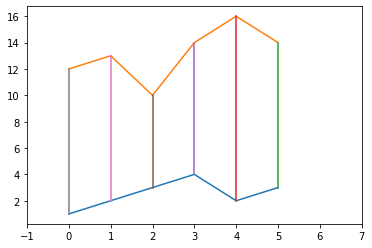

In [15]:
if __name__ == '__main__':
  main()